In [1]:
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline
import matplotlib.pylab as plt
import seaborn as sns

In [3]:
sns.set(style='whitegrid', rc={'figure.figsize':(20.7,8.27)})

# [Daphnet Freezing of Gait Data Set INFO](https://archive.ics.uci.edu/ml/datasets/Daphnet+Freezing+of+Gait)

In [6]:
from pdkit.gait_time_series import GaitTimeSeries
from pdkit.gait_processor import GaitProcessor
from scipy import interpolate, signal, fft
import numpy as np

from pdkit.utils import plot_walk_turn_clusters, plot_walks_turns

In [7]:
filepath = '/src/data/pdkit/dataset_fog_release/dataset/S01R01.txt'

In [8]:
ts = GaitTimeSeries.load_data(filepath, format_file='freeze')

Sampling rate is 64.0 Hz
Sampling rate is 64.0 Hz


In [9]:
ts.sampling_rate

64.0

In [10]:
gp = GaitProcessor(sampling_frequency=50.0, cutoff_frequency=2.0, filter_order=4)

In [11]:
rts = gp.resample_signal(ts)

In [18]:
# split signal into sections
# this is to avoid freezing as we are interested only in walking and turning

sections = gp.separate_into_sections(rts, labels_to_keep=[1])
sections = [gp.filter_data_frame(s, centre=True, keep_cols=['anno']) for s in sections]

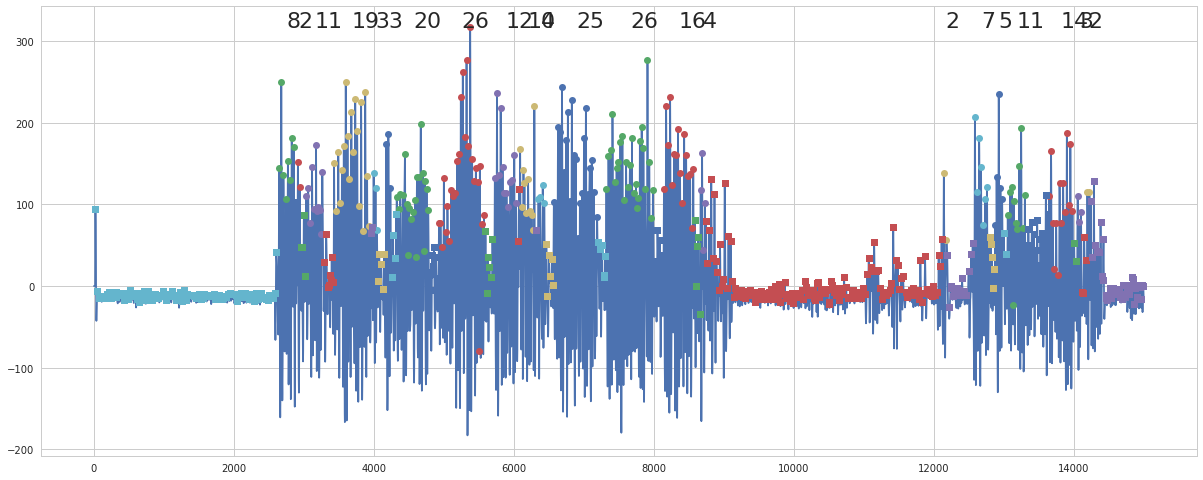

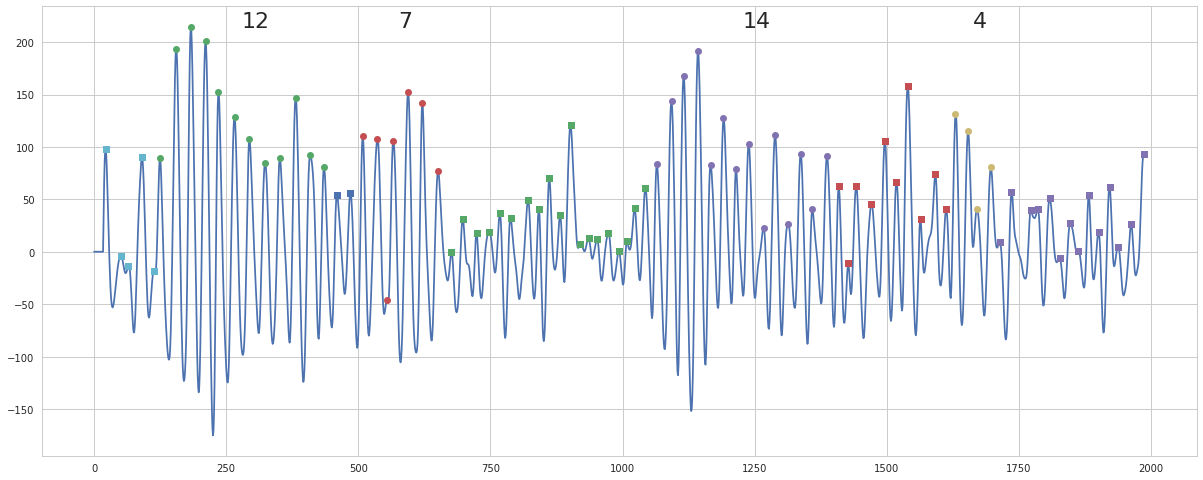

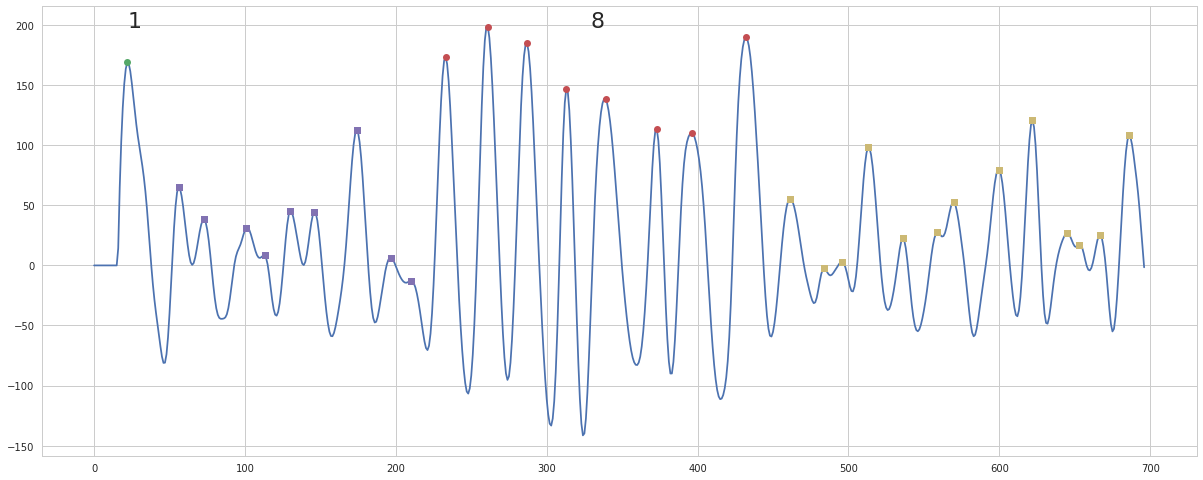

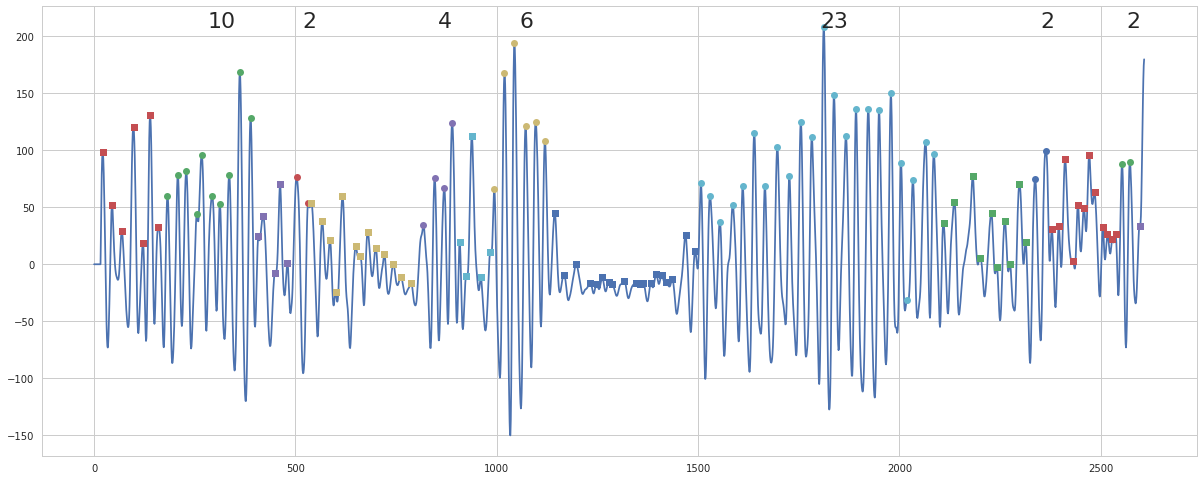

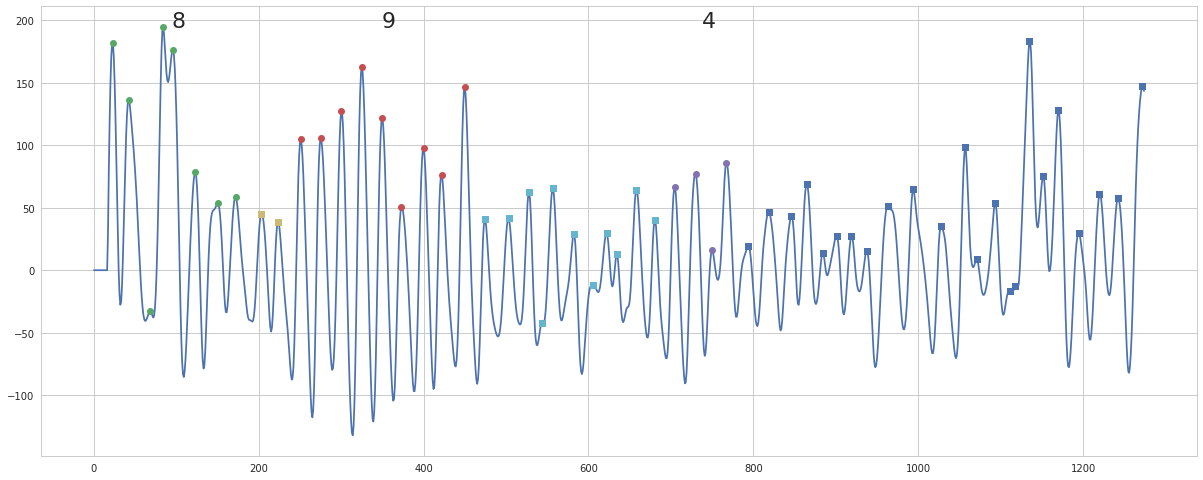

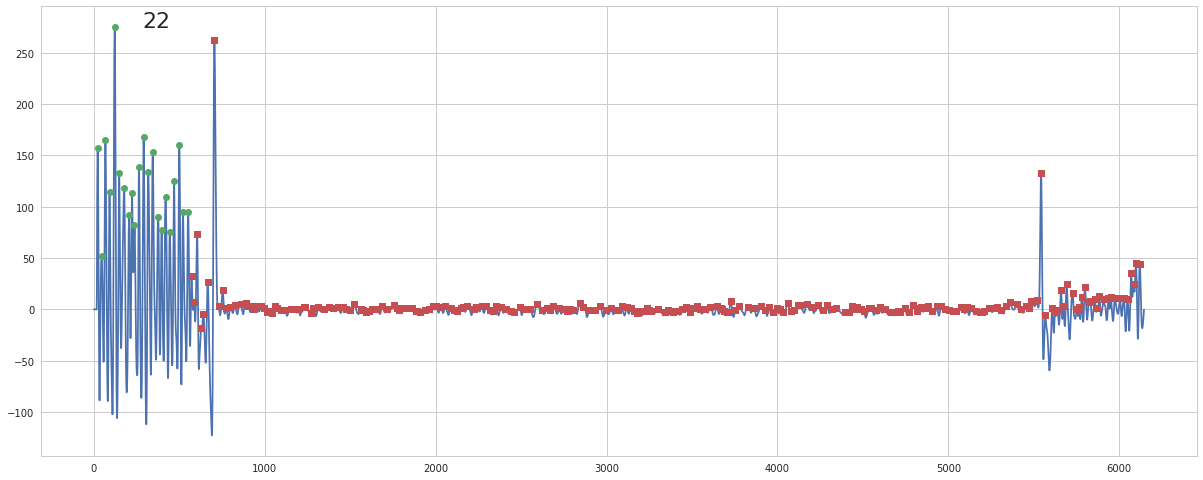

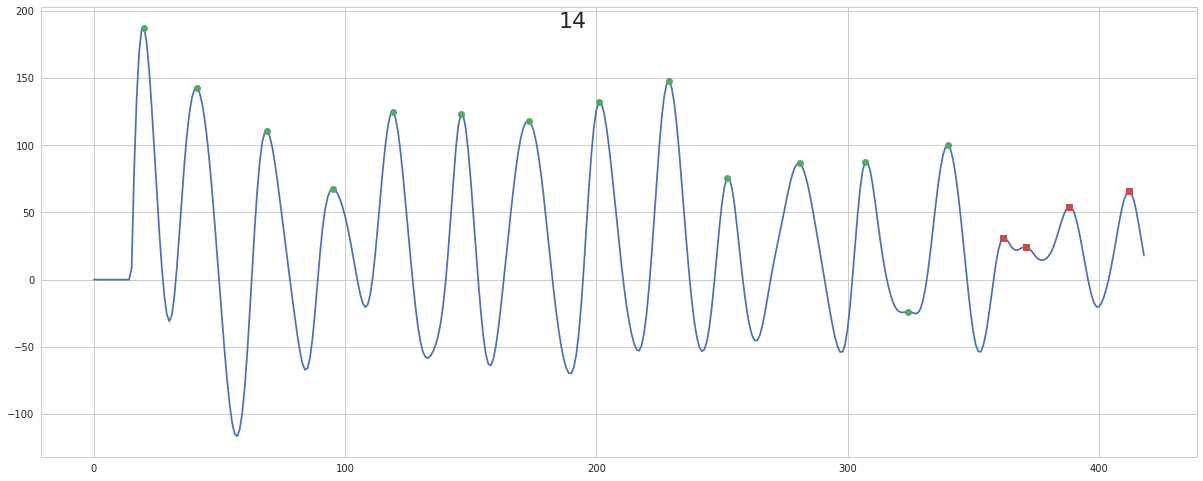

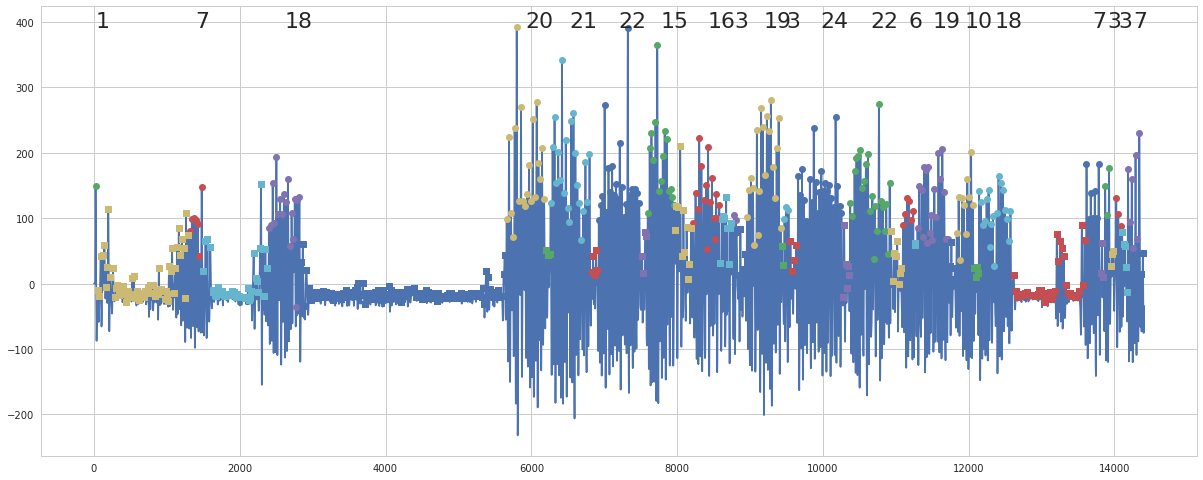

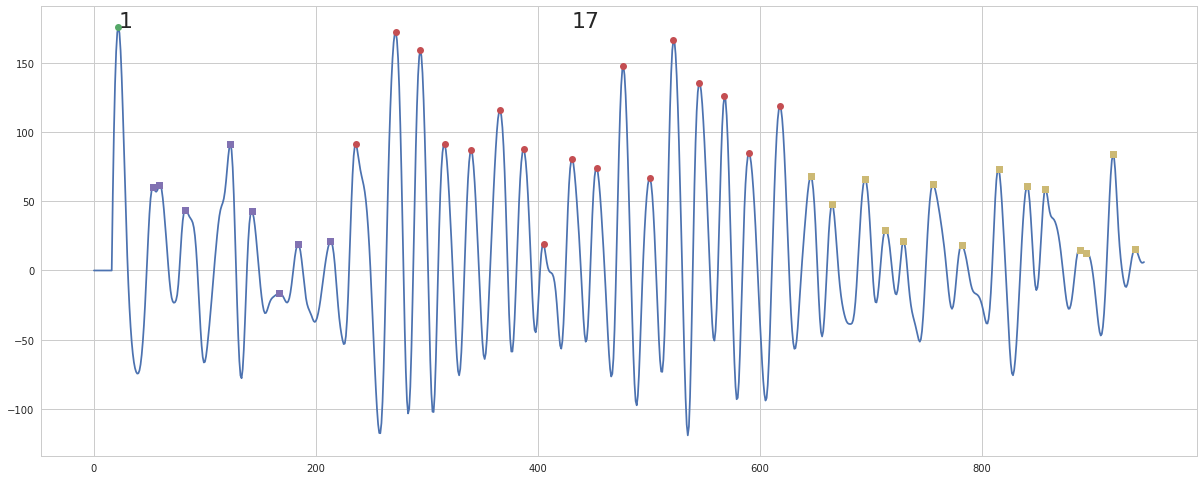

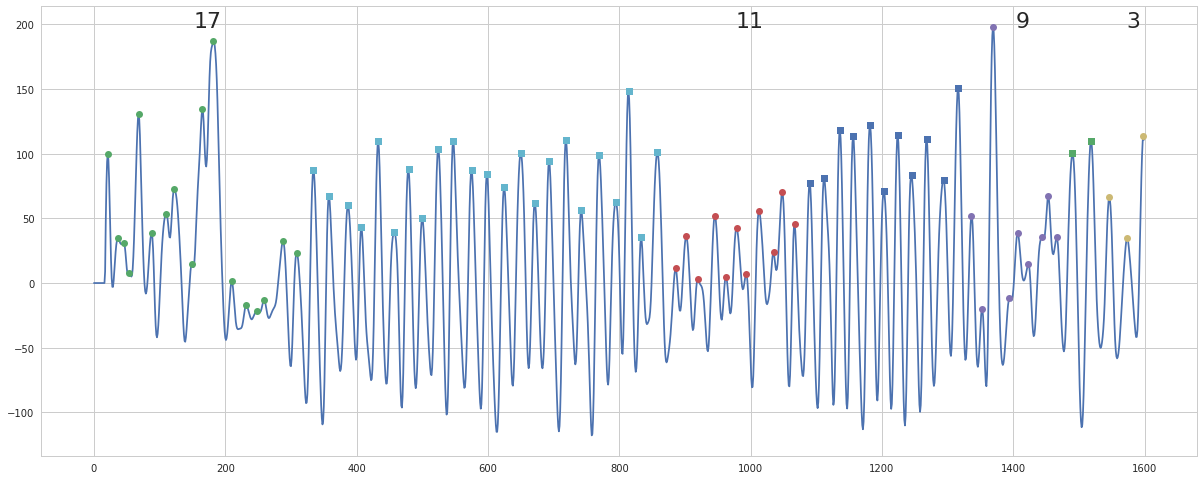

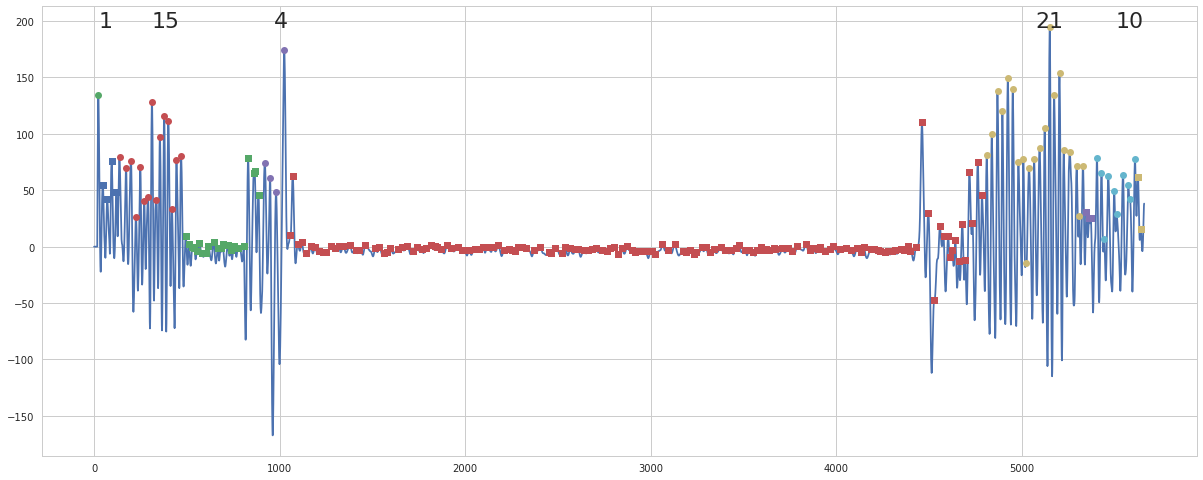

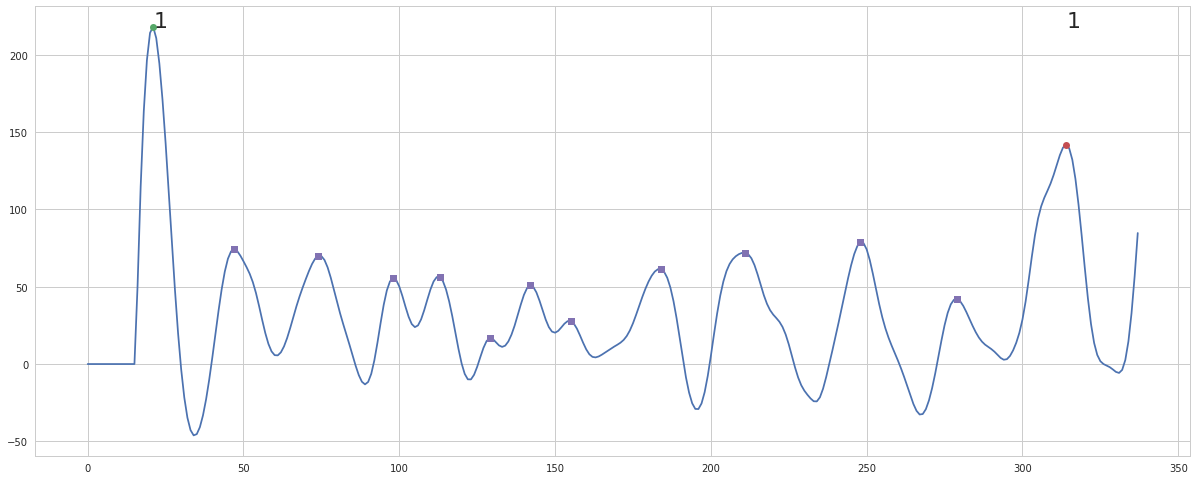

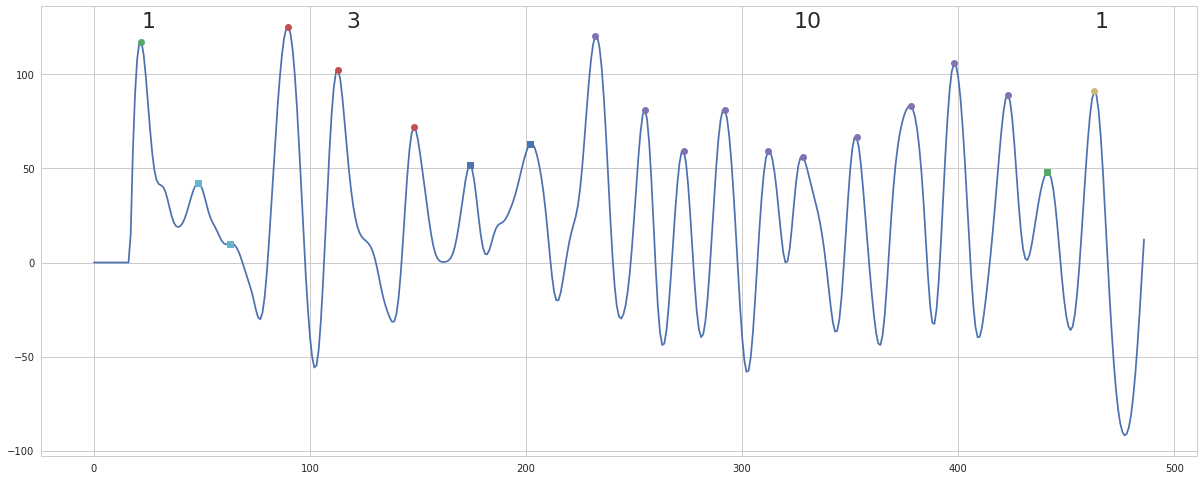

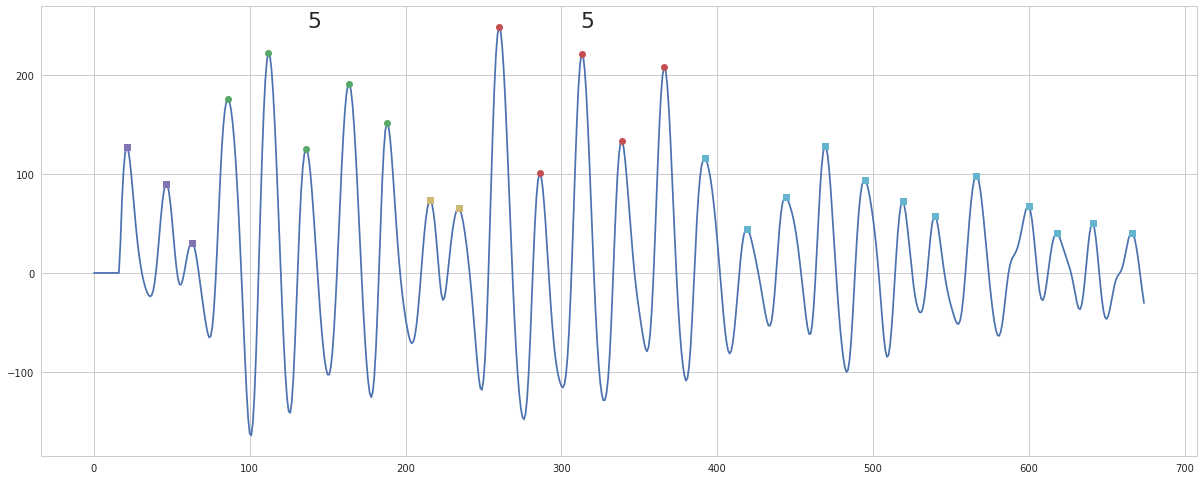

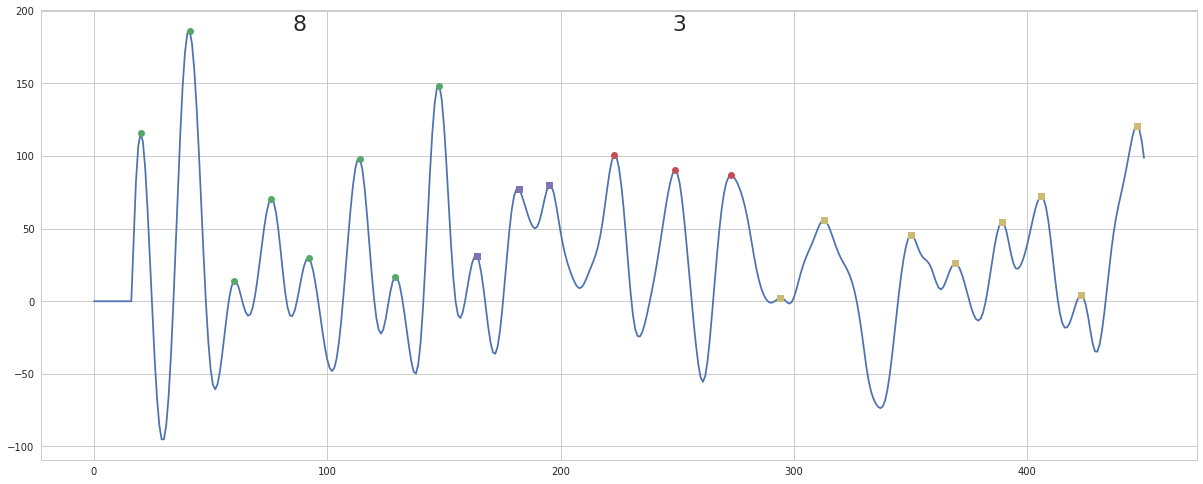

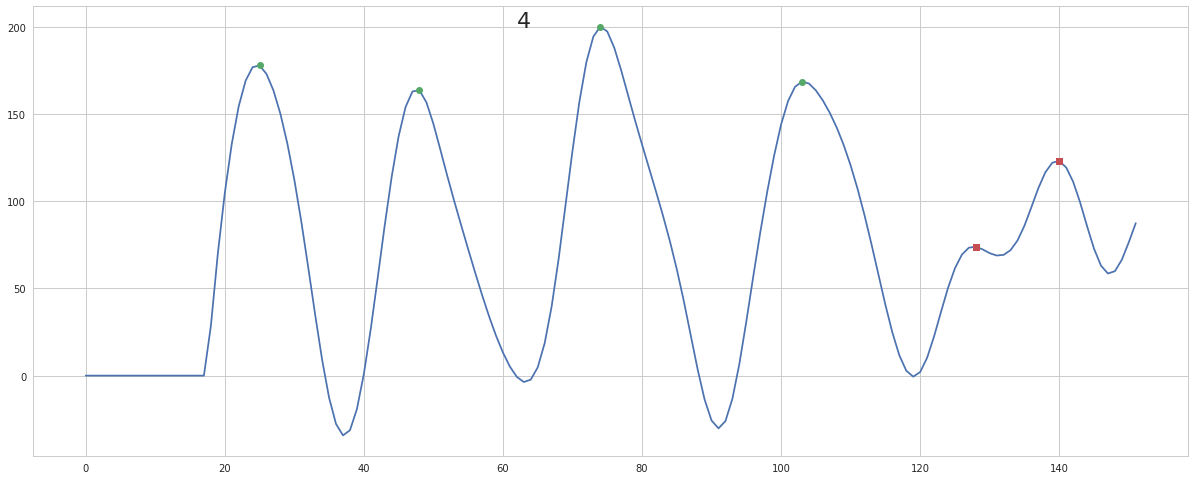

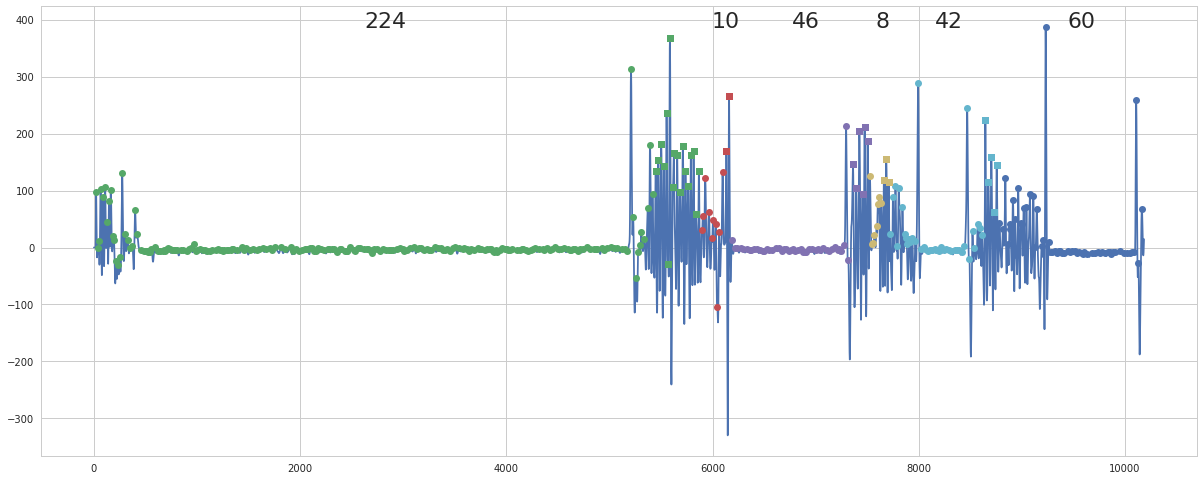

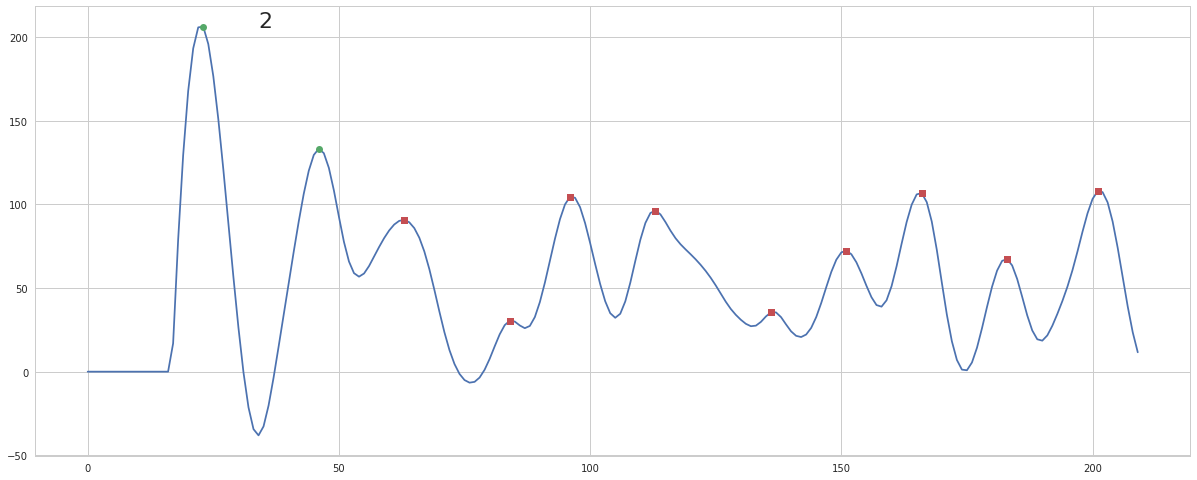

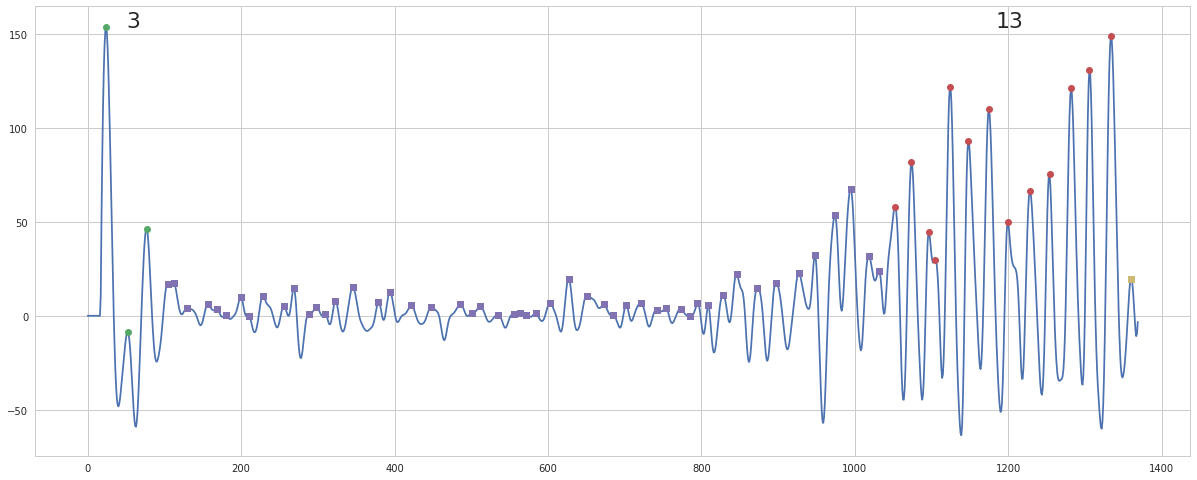

UnboundLocalError: local variable 'add' referenced before assignment

In [17]:
for s in sections:
    plot_walks_turns(s.mag_sum_acc.values)
    plt.show()

# [HuGaDB dataset INFO](https://github.com/romanchereshnev/HuGaDB)

In [19]:
from glob import glob

In [20]:
walks = glob('/src/data/pdkit/HuGaDB/*_walking_*')

In [21]:
filepath = walks[20]
filepath

'/src/data/pdkit/HuGaDB/HuGaDB_v1_walking_10_03.txt'

In [22]:
data = pd.read_csv(filepath, delimiter='\t',comment='#')

In [23]:
data.shape

(4816, 39)

In [32]:
# this dataset does not have timestamps so I had to infer the sampling rate from the description
# we used 1 because sample each second
# 58.82 because that's 679073 samples divided by 11544 seconds
# and we used 1000 because milliseconds to seconds

freq = int((1 / 58.82) * 1000)

In [33]:
# this will make that nice date index that we know and love ...
data.index = pd.date_range(start='1970-01-01', periods=data.shape[0], freq='{}ms'.format(freq))

In [34]:
data

,acc_rf_x,acc_rf_y,acc_rf_z,gyro_rf_x,gyro_rf_y,gyro_rf_z,acc_rs_x,acc_rs_y,acc_rs_z,gyro_rs_x,...,gyro_ls_z,acc_lt_x,acc_lt_y,acc_lt_z,gyro_lt_x,gyro_lt_y,gyro_lt_z,EMG_r,EMG_l,act
1970-01-01 00:00:00.000,-10460,-8232,9040,-342,169,194,-15496,-3136,-752,-1570,...,-273,-5352,-3424,-13856,-563,-826,1313,125,124,1
1970-01-01 00:00:00.017,-10940,-6540,8780,-90,-9,268,-15696,-4048,-480,-1068,...,-665,-5768,-5040,-12240,-1341,-640,925,122,124,1
1970-01-01 00:00:00.034,-10624,-7052,8044,159,-332,482,-13856,-4448,520,-619,...,-932,-5160,-3472,-10992,-1217,-508,453,120,124,1
1970-01-01 00:00:00.051,-9836,-7176,9508,383,-383,580,-12800,-4096,792,394,...,-888,-3464,-720,-7648,-744,-354,420,123,124,1
1970-01-01 00:00:00.068,-9860,-7424,10056,420,-349,605,-15504,2344,-776,376,...,-355,-3336,-608,-5440,-500,-150,736,129,131,1
1970-01-01 00:00:00.085,-10244,-6760,10572,437,-327,664,-18344,1600,-424,-396,...,3,-8624,352,-48,-683,-531,646,132,133,1
1970-01-01 00:00:00.102,-11972,-6040,9708,391,-280,731,-18440,1136,-792,-435,...,-15,-15504,3280,2904,-1064,-1222,483,130,133,1
1970-01-01 00:00:00.119,-11244,-5768,9532,398,-218,661,-14336,-1696,976,-363,...,-272,-29592,5008,9384,-1889,-2355,568,127,130,1
1970-01-01 00:00:00.136,-10256,-3320,11700,265,142,380,-14752,-400,2640,145,...,-517,-26840,1024,10632,-1692,-2148,820,129,133,1
1970-01-01 00:00:00.153,-10992,-4348,12108,20,585,168,-20128,2568,-184,-99,...,-273,-9312,-10504,31160,-454,-774,1043,132,132,1
